In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# loading the data into the dataframe
df = pd.read_csv('/content/city_day (1).csv')
print(df)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [27]:

#Display Dataset
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [28]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [29]:
# Check the total null values
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [30]:
# Handling missing values
# Drop rows where AQI is missing, as it's our target variable
df = df.dropna(subset=['AQI'])

Exploratory Data Analysis (EDA)

We visualize the data to identify patterns, correlations, and important features.

In [31]:
# Fill missing values only in numeric columns with their respective column means
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


/tmp/ipython-input-3735578052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


In [32]:
# Drop non-numeric and irrelevant columns
drop_columns = ['City', 'Date', 'AQI_Bucket'] # 'City' and 'Date' are categorical, 'AQI_Bucket' is redundant
df = df.drop(columns=drop_columns, errors='ignore')

# Drop 'NH3' column as it contains only NaN values and is causing the DataFrame to become empty
df = df.drop(columns=['NH3'], errors='ignore')

In [33]:
# Define target (dependent variable) and features (independent variables)
target = 'AQI'
features = [col for col in df.columns if col != target]  # All columns except AQI

X = df[features]  # Features dataset
y = df[target]  # Target variable


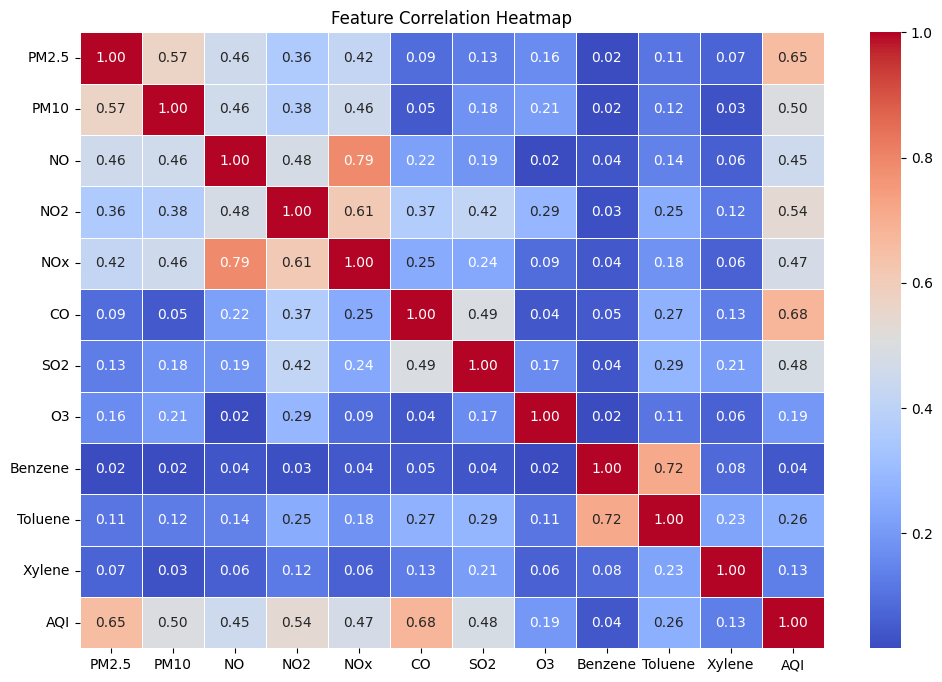

In [34]:
# Select only numerical columns for correlation
num_df = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Splitting Data into Training and Testing Sets


In [14]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [15]:
# Feature Scaling
# Standardize the dataset to have zero mean and unit variance
scaler = StandardScaler()

# Scale X_train and X_test directly, as non-numeric columns should have already been handled
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Choosing, Training and Evaluating the Models

In [16]:

# Initialize and define models to be tested
models = {
    "Linear Regression": LinearRegression(),  # Simple baseline model
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),  # Handles non-linearity well
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # Gradient boosting for performance
}


In [17]:

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model on scaled data
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}  # Store results
    print(f"{name} Performance:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}\n")

Linear Regression Performance:
MAE: 31.20, RMSE: 59.12, R2 Score: 0.81

Random Forest Performance:
MAE: 20.84, RMSE: 40.87, R2 Score: 0.91

XGBoost Performance:
MAE: 21.91, RMSE: 42.90, R2 Score: 0.90



In [18]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                         MAE       RMSE  R2 Score
Linear Regression  31.196988  59.117571  0.809138
Random Forest      20.842553  40.865827  0.908797
XGBoost            21.909305  42.901967  0.899482


Model Performance Comparison

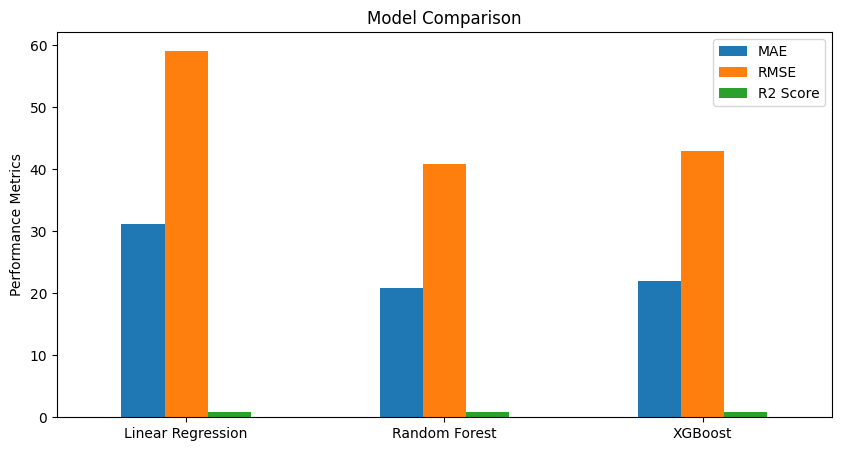

In [19]:
import matplotlib.pyplot as plt

# Plot model performance
results_df.plot(kind='bar', figsize=(10, 5))
plt.title("Model Comparison")
plt.ylabel("Performance Metrics")
plt.xticks(rotation=0)
plt.show()

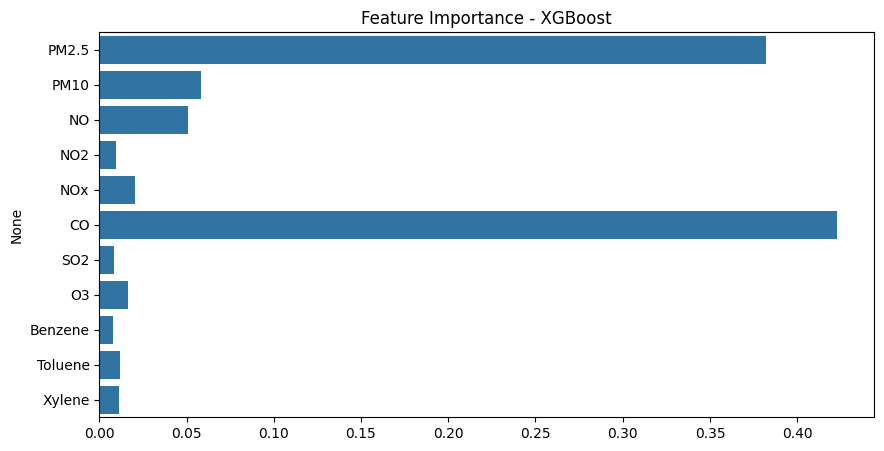

In [20]:

# Feature Importance Plot (For XGBoost)
feature_importance = models["XGBoost"].feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title("Feature Importance - XGBoost")
plt.show()

Hyperparameter Tuning

In [21]:
# Hyperparameter Tuning for XGBoost
# Define parameter grid for tuning
tuning_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [22]:

# Perform grid search with cross-validation
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), tuning_params, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print(f"Best XGBoost Parameters: {grid_search.best_params_}")  # Output the best parameters

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}


Saving the best model

In [23]:

pred_df = pd.DataFrame({'Predicted_AQI': y_pred})
pred_df.to_csv("aqi_predictions.csv", index=False)
print("Predictions saved to aqi_predictions.csv")

Predictions saved to aqi_predictions.csv


Actual vs. Predicted AQI Visualization

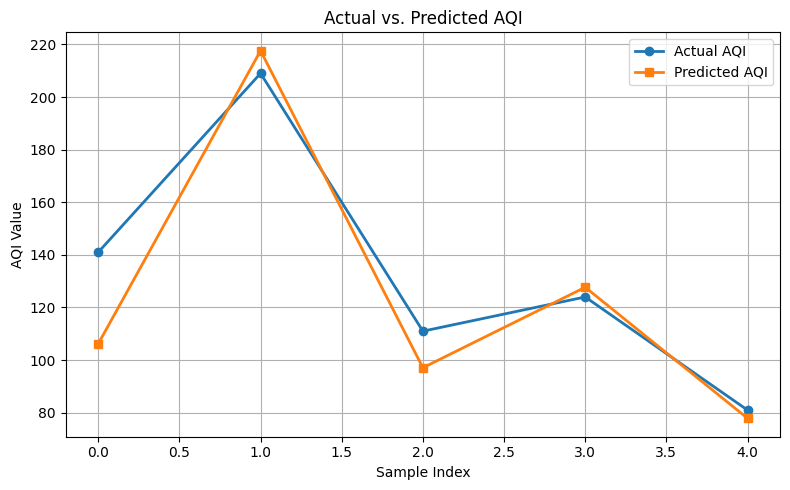

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays (safer for plotting)
actual = np.array(y_test[:5]).flatten()
predicted = np.array(y_pred[:5]).flatten()

plt.figure(figsize=(8,5))

plt.plot(range(len(actual)), actual,
         marker='o', linewidth=2, label="Actual AQI")

plt.plot(range(len(predicted)), predicted,
         marker='s', linewidth=2, label="Predicted AQI")

plt.xlabel("Sample Index")
plt.ylabel("AQI Value")
plt.title("Actual vs. Predicted AQI")
plt.legend()
plt.grid(True)   # optional but makes it clearer
plt.tight_layout()
plt.show()